# IMPORT

In [1]:
%matplotlib notebook
from utils.setup import *

# CREATION DATAFRAMES

In [2]:
TARGETS

['RES1_BASE',
 'RES11_BASE',
 'RES2_HC',
 'RES2_HP',
 'PRO1_BASE',
 'PRO2_HC',
 'PRO2_HP']

In [3]:
train = pd.read_csv(TRAIN_MERGED, index_col=0)
train['ds'] = train.index
test = pd.read_csv(TEST_MERGED, index_col=0)

# PROPHET

In [4]:
import fbprophet

In [5]:
def fill_trend(df,forecast,target):
    
    df = df.set_index(df.Horodate)
    forecast = forecast.set_index(forecast.ds)
    cols = list(forecast.columns)
    cols.remove('yhat')
    df = pd.merge(df,forecast, left_index=True, right_index=True)
    df.drop(cols,axis=1,inplace=True)
    
    if target in list(df.columns):
        cols = list(df.columns)
        cols.remove(target)
        cols.append(target)
        df = df[cols]
        
    df.reset_index(inplace=True)
    df.drop('index',axis=1,inplace=True)
    
    return df

In [6]:
import holidays

hol = {'ds':[],'holiday':[]}

for date, name in sorted(holidays.FRA(years=list(range(2013,2020))).items()):
    hol['ds'].append(date)
    hol['holiday'].append(name)

french_holidays = pd.DataFrame(hol,columns=['ds','holiday'])
french_holidays.head()

,ds,holiday
0,2013-01-01,Jour de l'an
1,2013-04-01,Lundi de Pâques
2,2013-05-01,Fête du Travail
3,2013-05-08,Armistice 1945
4,2013-05-09,Ascension


In [8]:
%matplotlib notebook

In [30]:
train = pd.read_csv(TRAIN_MERGED, index_col=0)
train['ds'] = train.index
test = pd.read_csv(TEST_MERGED, index_col=0)

def prophet_feature(df_train, df_test, target):

    # Formating for prophet

    data = df_train[['ds', target]]
    data['y_orig'] = df_train[target]
    data.reset_index(inplace=True, drop=True)
    data.rename(columns={target:'y'}, inplace=True)
    data['y'] = np.log(data['y'] + 0.001) #log transform
    data.dropna(inplace=True)

    # Future Dataframe
    
    future = pd.DataFrame(pd.date_range(start=data.iloc[0]['ds'], end=data.iloc[-1]['ds'], freq='30min'),columns=['ds'])

    # Prophet Model

    model = fbprophet.Prophet(changepoint_prior_scale=0.4)
    model.fit(data)
    forecast = model.predict(future)

    # Unlog data

    forecast['yhat'] = np.exp(forecast['yhat']) - 0.001
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower']) - 0.001
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper']) - 0.001

    data['y_log'] = data['y']
    data['y'] = data['y_orig']

    # Predictions extraction

    trend = pd.DataFrame(forecast['yhat'].values, index=forecast['ds'].values, columns=['prophet_{}'.format(target)])
    trend.index = pd.to_datetime(trend.index)
    df_train = df_train.join(trend, how='inner')
    df_test = df_test.join(trend, how='inner')

    # Plot predictions

    plt.figure()
    plt.title(target)
    df_train[target].plot(label='Truth')
    forecast.set_index(forecast['ds'].apply(pd.to_datetime))['yhat'].plot(alpha=0.5, label='Pred')
    plt.legend()
    plt.show()
    
    return df_train, df_test

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

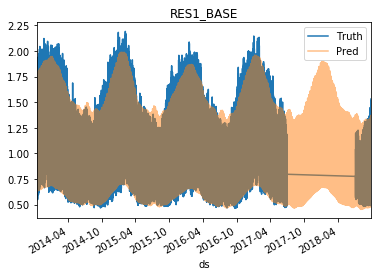

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

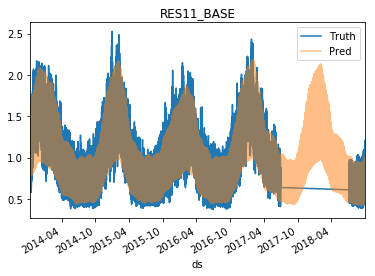

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

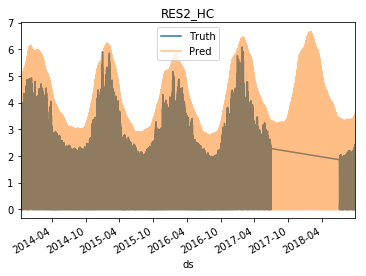

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

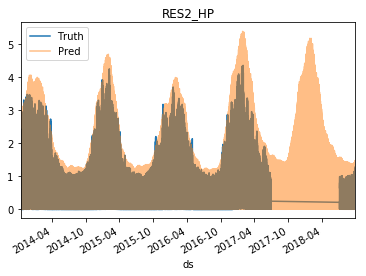

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

limit_output extension: Maximum message size of 10000 exceeded with 10755 characters

In [31]:
for tar in TARGETS:    
    train, test = prophet_feature(train, test, tar)

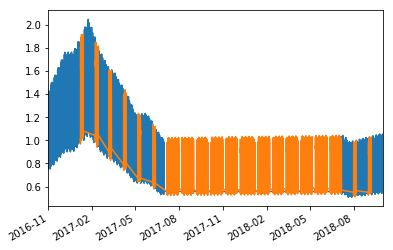

In [35]:
%matplotlib inline
plt.figure()
train['prophet_PRO1_BASE'].plot()
test['prophet_PRO1_BASE'].plot()
plt.show()

In [36]:
pd.DataFrame.to_csv(train, 'train_prophet.csv')
pd.DataFrame.to_csv(test, 'test_prophet.csv')